<a href="https://colab.research.google.com/github/annisaeka123/Machine_Learning-Semester5/blob/main/JS09/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS**

TUGAS 1

1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

Import library dan load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Baca dataset
df = pd.read_csv('voice.csv')

# Lihat 5 data teratas
print(df.head())
print(df.info())


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

Cek missing values & encoding label

In [2]:
# Cek data kosong
print(df.isnull().sum())

# Encode label: female=0, male=1
df['label'] = df['label'].map({'female': 0, 'male': 1})


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


Pisahkan fitur dan label

In [3]:
X = df.drop('label', axis=1)
y = df['label']

Split data dan scaling

In [4]:
# Bagi data menjadi 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Mencari nilai k terbaik

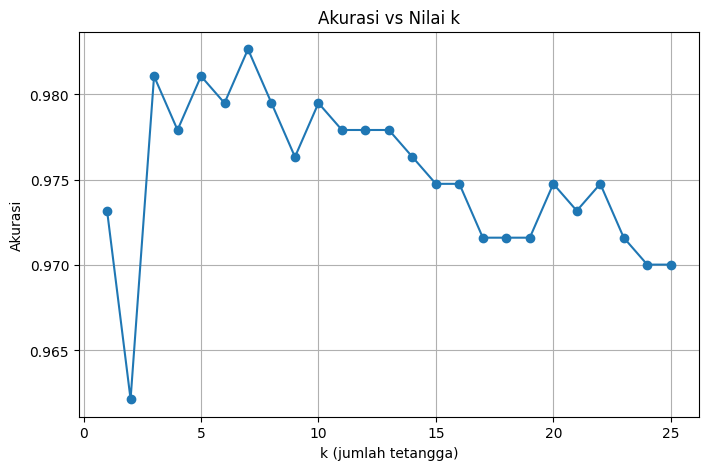

Nilai k terbaik: 7 dengan akurasi: 0.9826


In [5]:
k_values = range(1, 26)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi vs Nilai k')
plt.xlabel('k (jumlah tetangga)')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f'Nilai k terbaik: {best_k} dengan akurasi: {best_acc:.4f}')


Evaluasi model terbaik

In [6]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[290   7]
 [  4 333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       297
           1       0.98      0.99      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Analisis fitur

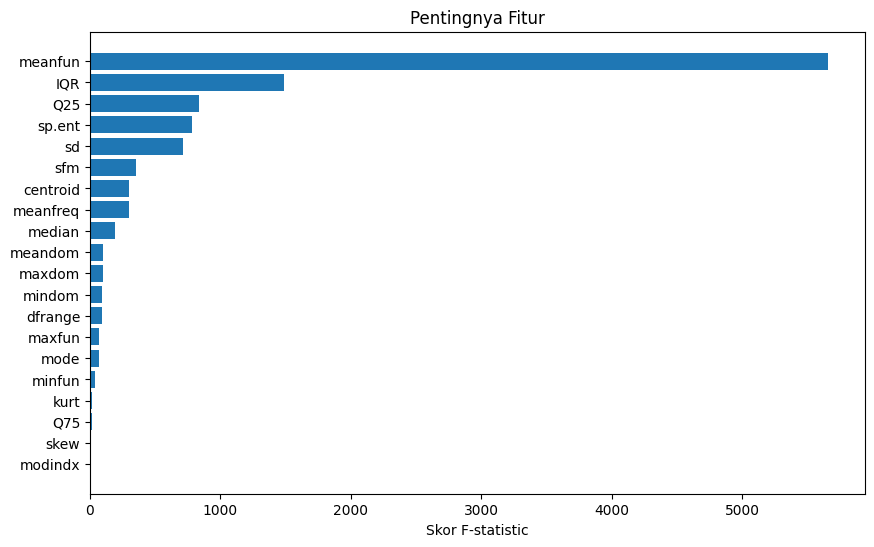

     Feature        Score
12   meanfun  5657.654508
5        IQR  1485.735985
3        Q25   837.729526
8     sp.ent   782.686378
1         sd   712.418069
9        sfm   353.096787
11  centroid   295.998697
0   meanfreq   295.998697
2     median   193.303849
15   meandom    98.641293


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Uji pentingnya fitur
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(scores['Feature'], scores['Score'])
plt.xlabel('Skor F-statistic')
plt.title('Pentingnya Fitur')
plt.gca().invert_yaxis()
plt.show()

print(scores.head(10))


Berdasarkan percobaan, akurasi tertinggi diperoleh pada nilai k = 7 dengan akurasi 0.9826.

Fitur-fitur dengan skor F-statistic tertinggi (paling informatif) adalah:

- meanfun

- IQR

- Q25

- sp.ent

Fitur-fitur tersebut memberikan pemisahan paling baik antara suara laki-laki dan perempuan karena mencerminkan perbedaan frekuensi dominan dan sebaran spektrum suara.

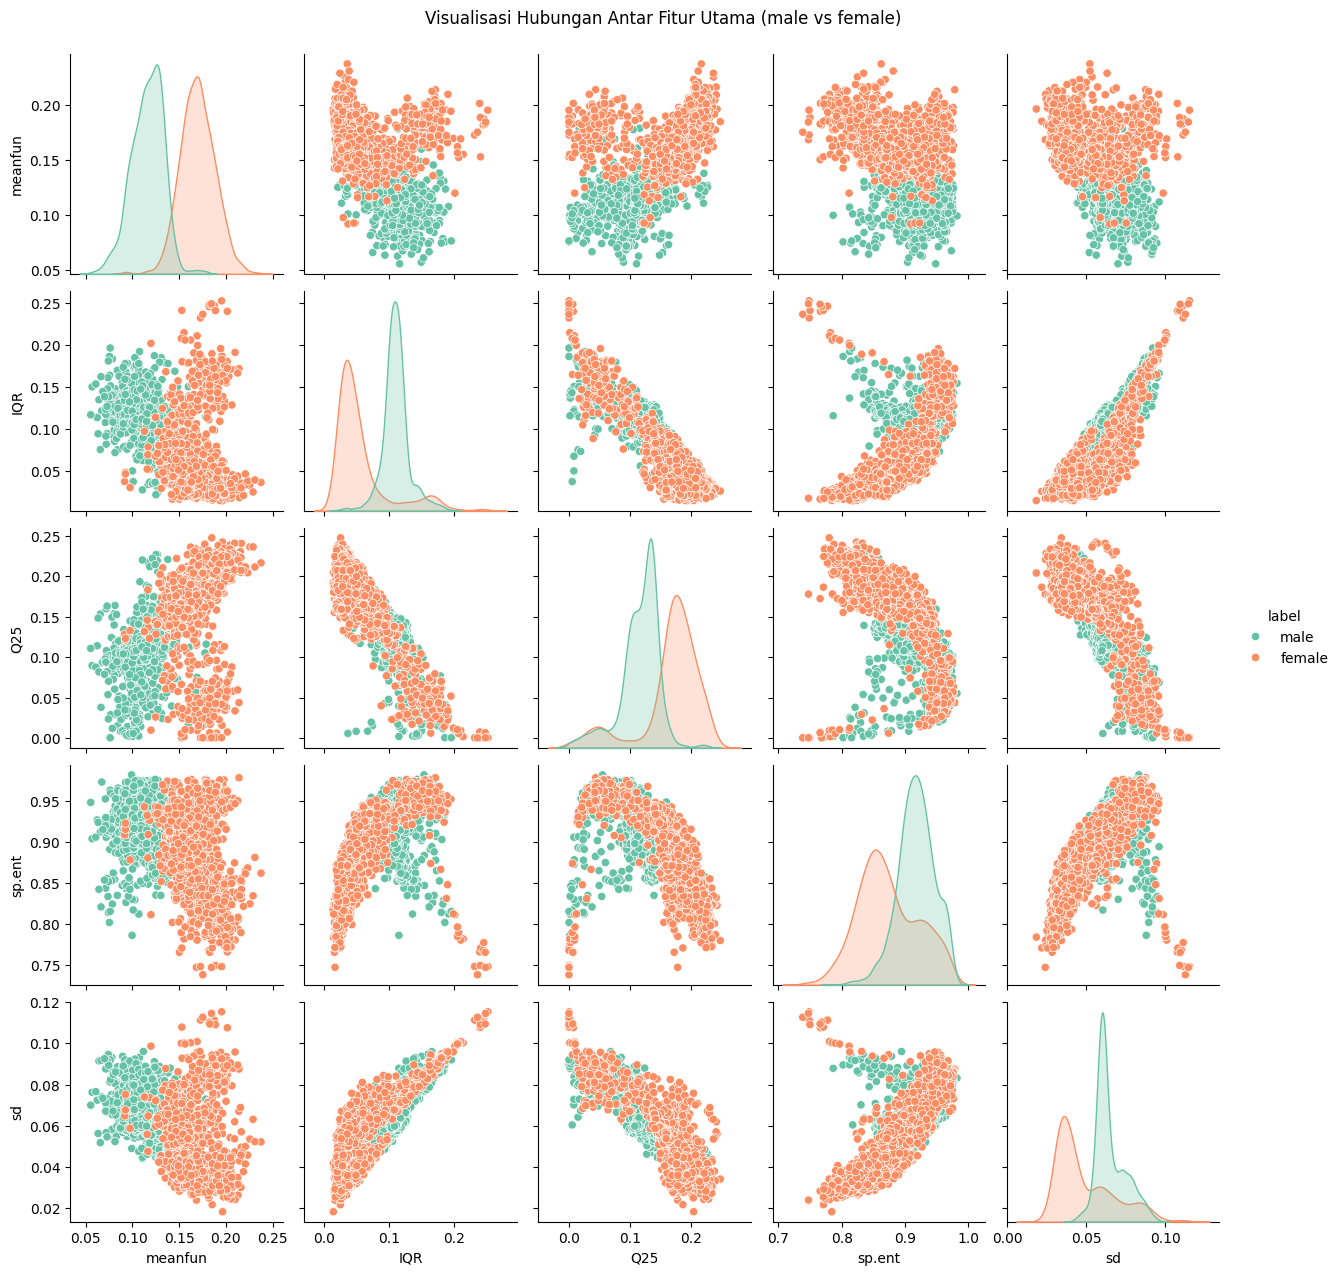

In [8]:
import seaborn as sns

# Pilih 4–5 fitur terbaik berdasarkan hasil SelectKBest sebelumnya
top_features = scores['Feature'].head(5).tolist()

# Gabungkan data label agar bisa dipakai seaborn
plot_df = df[top_features + ['label']].copy()

# Ganti 0 dan 1 jadi nama biar mudah dibaca
plot_df['label'] = plot_df['label'].map({0: 'female', 1: 'male'})

# Visualisasi pairplot
sns.pairplot(plot_df, hue='label', diag_kind='kde', palette='Set2')
plt.suptitle('Visualisasi Hubungan Antar Fitur Utama (male vs female)', y=1.02)
plt.show()


Berdasarkan hasil visualisasi pairplot, terlihat bahwa data suara laki-laki (male) dan perempuan (female) memiliki pola distribusi yang berbeda pada beberapa fitur utama seperti meanfun, IQR, Q25, dan sp.ent. Fitur-fitur ini menunjukkan pemisahan yang cukup jelas antara kedua kelas. Suara laki-laki umumnya memiliki nilai meanfun yang lebih rendah dibandingkan suara perempuan karena perbedaan rentang frekuensi dasar secara fisiologis. Selain itu, fitur-fitur seperti IQR dan Q25 juga menggambarkan variasi dan sebaran energi frekuensi yang berbeda antara kedua jenis suara.

Visualisasi distribusi (kde plot) menunjukkan adanya dua puncak distribusi yang terpisah antara kelas male dan female, menandakan bahwa fitur-fitur tersebut efektif dalam membedakan kedua kategori. Korelasi yang cukup kuat antara fitur-fitur berbasis frekuensi seperti Q25, Q75, dan IQR turut memperkuat kemampuan model dalam mengenali pola suara.

Hasil pengujian menggunakan algoritma k-Nearest Neighbors (kNN) menunjukkan bahwa nilai k = 7 memberikan akurasi terbaik, yaitu sekitar 98% pada data uji. Hal ini menunjukkan bahwa dengan pemilihan fitur berbasis frekuensi dan entropi (meanfun, IQR, Q25, dan sp.ent), model kNN mampu mengklasifikasikan jenis suara dengan sangat baik. Secara keseluruhan, fitur-fitur tersebut memberikan kontribusi signifikan terhadap performa model karena secara langsung merepresentasikan karakteristik khas antara suara laki-laki dan perempuan.

TUGAS 2

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data spam.csv

2. Fitur CountVectorizer dengan mengaktifkan stop_words

3. Evaluasi hasilnya

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data spam.csv

2. Fitur TF-IDF dengan mengaktifkan stop_words

3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Import Library dan Load Dataset

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Hapus kolom tidak relevan
df = df.drop(df.iloc[:, 2:], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Encode label: spam=1, ham=0
df['label'] = df['label'].str.strip().str.lower().map({'spam': 1, 'ham': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


MultinomialNB dengan CountVectorizer (stop_words='english')

In [10]:
# CountVectorizer
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Model Naive Bayes
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Prediksi dan evaluasi
y_pred_cv = mnb_cv.predict(X_test_cv)
acc_cv = accuracy_score(y_test, y_pred_cv)

print("=== MultinomialNB + CountVectorizer ===")
print(f"Akurasi: {acc_cv:.4f}")
print(classification_report(y_test, y_pred_cv))


=== MultinomialNB + CountVectorizer ===
Akurasi: 0.9839
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



MultinomialNB dengan TF-IDF (stop_words='english')

In [11]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Naive Bayes
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("\n=== MultinomialNB + TF-IDF ===")
print(f"Akurasi: {acc_tfidf:.4f}")
print(classification_report(y_test, y_pred_tfidf))



=== MultinomialNB + TF-IDF ===
Akurasi: 0.9668
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Evaluasi dan Perbandingan Hasil

Berdasarkan hasil pengujian, model Multinomial Naive Bayes dengan CountVectorizer menghasilkan akurasi sebesar 98.39%, sedangkan model dengan TF-IDF menghasilkan akurasi sedikit lebih rendah yaitu 96.68%. Model dengan CountVectorizer juga menunjukkan nilai recall dan f1-score yang lebih seimbang antara kelas spam dan ham, dengan f1-score masing-masing sebesar 0.99 untuk kelas ham dan 0.94 untuk kelas spam. Sementara itu, model TF-IDF menunjukkan performa sangat baik pada kelas ham (recall 1.00) namun relatif lebih rendah pada kelas spam (recall 0.75), yang berarti beberapa pesan spam masih salah diklasifikasikan sebagai ham.

Perbedaan performa ini terjadi karena CountVectorizer hanya menghitung frekuensi kemunculan kata tanpa mempertimbangkan bobot relatif antar dokumen, sehingga cocok untuk dataset spam.csv yang sederhana dan memiliki pola kata spam yang sering berulang. Sebaliknya, TF-IDF memberikan bobot lebih tinggi pada kata-kata unik dan menurunkan bobot kata umum, sehingga lebih cocok untuk dataset teks yang lebih kompleks dan beragam. Dalam kasus ini, karena banyak kata spam muncul berulang dengan pola serupa, CountVectorizer dapat mengenali pola tersebut dengan lebih baik sehingga memberikan akurasi yang lebih tinggi.

Kesimpulan

Dari hasil evaluasi dan perbandingan, dapat disimpulkan bahwa fitur terbaik untuk kasus klasifikasi pesan spam pada dataset spam.csv adalah CountVectorizer dengan stop_words aktif. Fitur ini memberikan performa yang lebih stabil dan akurasi lebih tinggi dibandingkan TF-IDF pada dataset dengan pola kata yang berulang dan sederhana. Namun, untuk dataset teks yang lebih kompleks atau dengan variasi kata yang tinggi, TF-IDF tetap menjadi pilihan yang lebih unggul karena mampu menonjolkan kata-kata yang paling relevan terhadap kelas tertentu.